In [2]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datasets

Box Office Mojo:
- bom.movie_gross.csv.gz

IMDB (more infor info [here](https://www.imdb.com/interfaces/)):
- imdb.name.basics.csv.gz
- imdb.title.akas.csv.gz
- imdb.title.basics.csv.gz
- imdb.title.crew.csv.gz
- imdb.title.principals.csv.gz
- imdb.title.ratings.csv.gz

Rotten Tomatoes:
- rt.movie_info.tsv.gz
- rt.reviews.tsv.gz

TheMovieDB:
- tmdb.movies.csv.gz

The Numbers:
- tn.movie_budgets.csv.gz

In [3]:
imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
a =imdb_title_basics_df['runtime_minutes'].value_counts()


average = imdb_title_basics_df["runtime_minutes"].value_counts().mean()

q_high = imdb_title_basics_df["runtime_minutes"].value_counts().quantile(1)

q_low = imdb_title_basics_df["runtime_minutes"].value_counts().quantile(.65)
imdb_filtered = [(a > q_low)]
print(q_high , q_low, average , imdb_filtered)
type(imdb_filtered)
#Initial attempt to get the range of the occurances using quartile range in the value_counts

7131.0 120.80000000000001 311.7302452316076 [90.0      True
80.0      True
85.0      True
100.0     True
95.0      True
         ...  
382.0    False
724.0    False
808.0    False
287.0    False
540.0    False
Name: runtime_minutes, Length: 367, dtype: bool]


list

In [79]:
imdb_title_basics_df.loc[imdb_title_basics_df['runtime_minutes'] == 90, ['genres']].value_counts().to_frame()
#above seeing what genre of film occurs most often when it is the length of the most common
#runtime
#can use to give a more pinpoint specific film to create

,0
genres,
Documentary,1195
Drama,1132
Comedy,617
Horror,284
"Comedy,Drama",223
...,...
"Biography,Comedy,History",1
"Horror,Romance,Sci-Fi",1
"Biography,Comedy,Crime",1


In [86]:
imdb_title_basics_df.loc[imdb_title_basics_df['runtime_minutes'] == 88, ['original_title']].value_counts().to_frame()

,0
original_title,
Jake,2
Dog Years,2
Hypnoesis,2
Cardboard Boxer,2
All In,2
...,...
Reality Terror Night,1
Really Pathetic & Totally Awkward,1
Recapture,1


Text(0.5, 0, 'Run Times in Minutes')

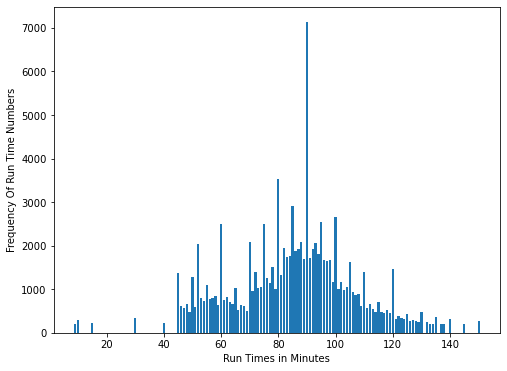

In [84]:
va = imdb_title_basics_df['runtime_minutes'].value_counts().nlargest(100)

vas = imdb_title_basics_df['runtime_minutes'].value_counts().index[0:100]
va, vas
fig, ax =plt.subplots(figsize = (8,6))
ax.bar(vas , va )
ax.set_ylabel("Frequency Of Run Time Numbers")
ax.set_xlabel("Run Times in Minutes")

In [ ]:
#Graph that shows frequncy of runtimes
#Have to find a way to asociate with box office, could do that with genre's but seeing if
#run time really helps

In [83]:

x = imdb_title_basics_df['runtime_minutes']
x = x[x.between(x.quantile(.99), x.quantile(1))]
x.head(25)

0       175.0
12      180.0
15      160.0
70      280.0
75      181.0
160     163.0
213     161.0
291     200.0
311     169.0
434     169.0
545     180.0
953     180.0
1199    288.0
1234    180.0
1284    197.0
1409    208.0
1471    222.0
1658    162.0
1671    174.0
1731    226.0
1846    192.0
1958    260.0
2044    165.0
2168    180.0
2396    225.0
Name: runtime_minutes, dtype: float64

In [140]:
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t')

In [148]:
rt_movie_info_df['runtime']
rt_movie_info_df['runtime'].str.split()
rt_movie_info_df['running_mins']=rt_movie_info_df['runtime'].str.split()
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
 12  running_mins  1530 non-null   object
dtypes: int64(1), object(12)
memory usage: 158.6+ KB


In [149]:
rt_movie_info_df['run_time']= rt_movie_info_df['running_mins'].str[0]

rt_movie_info_df['run_time']
#run time can in the form of (# minutes). So needed to seperate the string to just get the number

0       104
1       108
2       116
3       128
4       200
       ... 
1555    106
1556     88
1557    111
1558    101
1559     94
Name: run_time, Length: 1560, dtype: object

<BarContainer object of 100 artists>

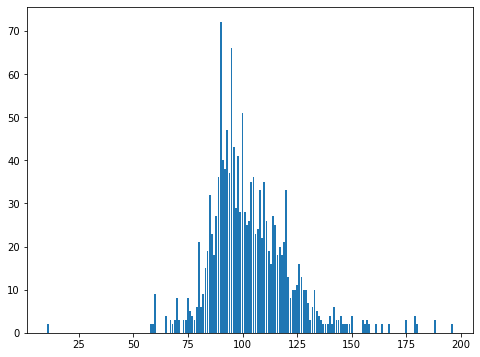

In [167]:
#individual graph of top 100 IMDB time occurances
ka = rt_movie_info_df['runtime'].value_counts().nlargest(100)
kas = rt_movie_info_df['runtime'].value_counts().index[0:100]
fig, ax =plt.subplots(figsize = (8,6))
ax.bar(kas , ka )

<BarContainer object of 100 artists>

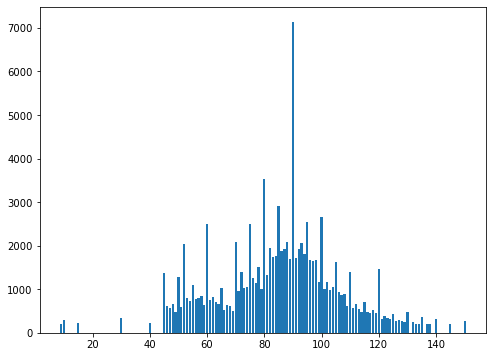

In [169]:
#bar graph of rotten tomatoes time occurances, top 100
va = imdb_title_basics_df['runtime_minutes'].value_counts().nlargest(100)

vas = imdb_title_basics_df['runtime_minutes'].value_counts().index[0:100]
va, vas
fig, ax =plt.subplots(figsize = (8,6))
ax.bar(vas , va )

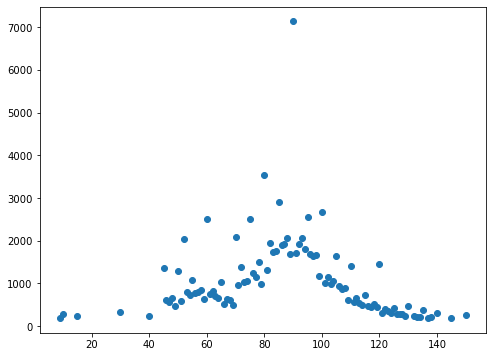

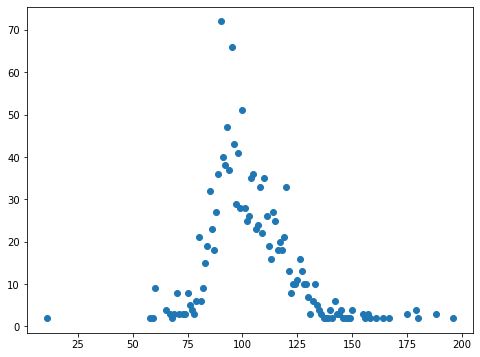

In [203]:
va = imdb_title_basics_df['runtime_minutes'].value_counts().nlargest(100)

vas = imdb_title_basics_df['runtime_minutes'].value_counts().index[0:100]
ka = rt_movie_info_df['runtime'].value_counts().nlargest(100)
kas = rt_movie_info_df['runtime'].value_counts().index[0:100]

fig_1, ax =plt.subplots(figsize = (8,6))
ax.scatter(vas , va )

fig_2 , ax= plt.subplots(figsize = (8,6))
ax.scatter(kas , ka)
#graph showing both of the top 100 most occurred time for IMDB File 'first graph' and Rotten Tomatoes File 'second graph' 
#shows that the range of most common movie length falls in between 80 to 110 minutes



In [ ]:
#hue color for box office strength

In [253]:
imdb_title_basics_df['use_runtime'] = imdb_title_basics_df['runtime_minutes'].value_counts()
imdb_title_basics_df
#created use_runtime colomn 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,use_runtime
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",NaN
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",17.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,44.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",84.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",130.0
...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN,NaN


In [250]:
rt_movie_info_df.head(3)
#show runtime is now a float and not a string

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,studio,runtime
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,NaN,104.0
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",Entertainment One,108.0
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,NaN,116.0


<AxesSubplot:ylabel='runtime_minutes'>

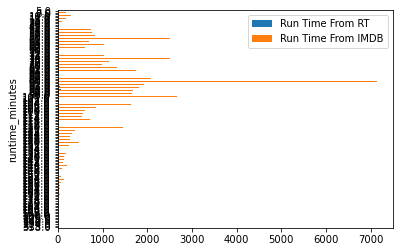

In [249]:
df_new_df = pd.DataFrame()
q = rt_movie_info_df.dropna(subset=['box_office'])
q
df_new_df['Run Time From RT'] = rt_movie_info_df['runtime'].value_counts() 
df_new_df['Run Time From IMDB'] = imdb_title_basics_df['runtime_minutes'].value_counts()
df_new_df['Box Office From RT Movies'] = 
df_new_df.index.name = 'runtime_minutes'
df_new_df.sort_values(by = 'runtime_minutes', ascending = False, inplace = True)
df_new_df.plot(kind= 'barh')
#graph of occurences of time lengths of movies. 